In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1. Находим наиболее протяженный участок для sar_3.jpg и выделяем линии при помощи преобразования Хафа

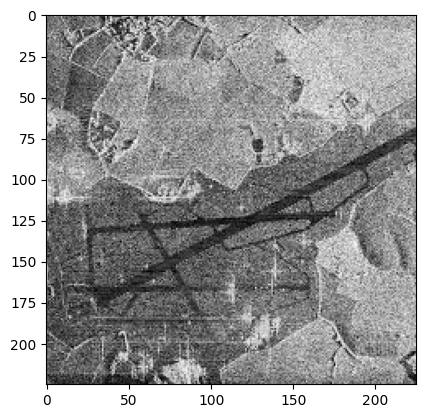

In [6]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

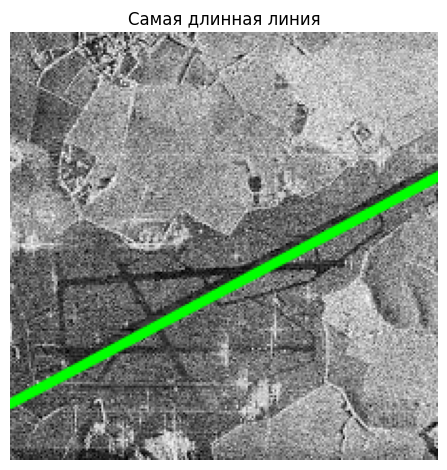

In [7]:
edges = cv2.Canny(image_gray, 100, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 140)

max_length = 0
longest_line = None
image_with_lines = image.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)

        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

if longest_line is not None:
    cv2.line(image_with_lines, longest_line[0], longest_line[1], (0, 255, 0), 3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Самая длинная линия')
plt.axis('off')

plt.tight_layout()
plt.show()

2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

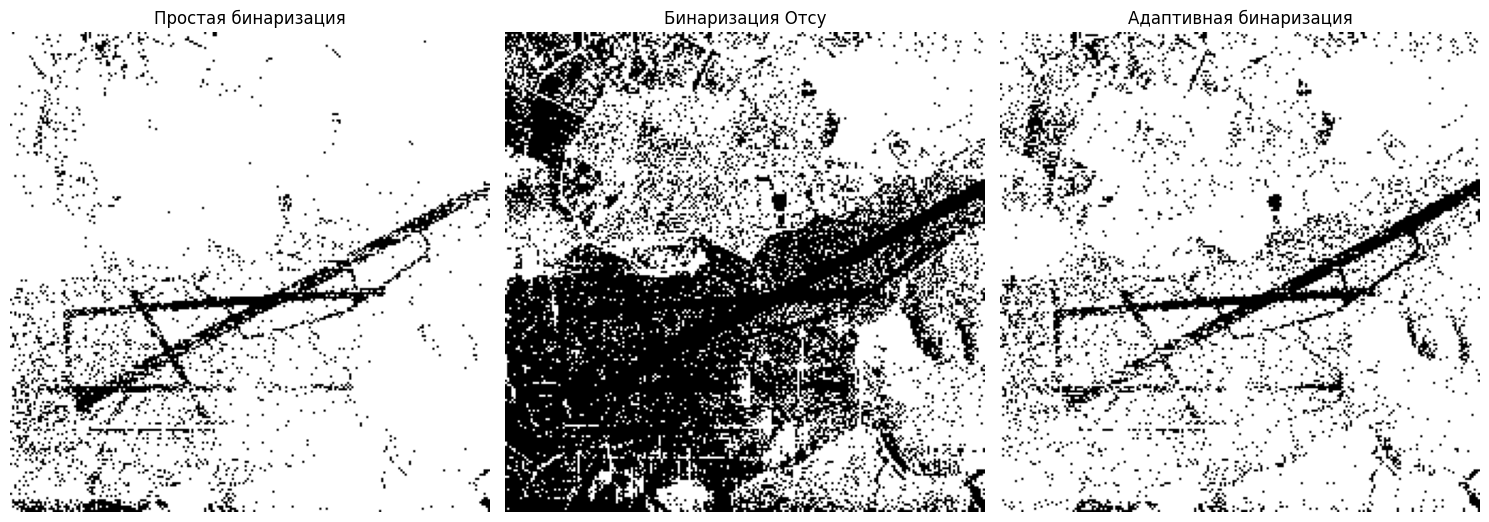

In [8]:
_, global_thresh = cv2.threshold(image_gray, 60, 255, cv2.THRESH_BINARY)
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 101, 45)
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(global_thresh, cmap='gray')
plt.title('Простая бинаризация')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Бинаризация Отсу')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Адаптивная бинаризация')
plt.axis('off')

plt.tight_layout()
plt.show()

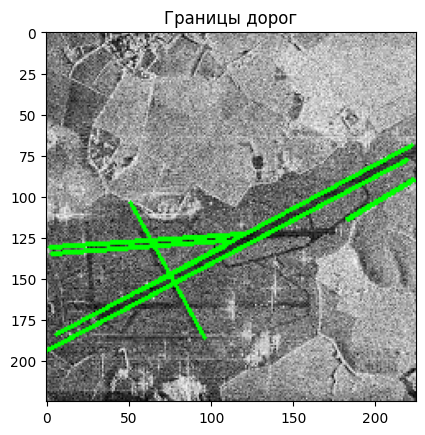

In [9]:
blurred = cv2.GaussianBlur(adaptive_thresh, (7, 7), 0)
canny = cv2.Canny(blurred, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=10)

lane_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lane_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.title('Границы дорог')
plt.show()